# Assessment for Advanced Data Science

## Christian Cabrera, Radzim Sendyka, Carl Henrik Ek and Neil D. Lawrence

### 6th November 2023



## Attribution

This is also available in the readme of the [repository](https://github.com/jeffrey-22/ads).

There are mainly three data sources used in this project:

- [UK House Price Data](https://www.gov.uk/government/statistical-data-sets/price-paid-data-downloads)
    - Contains HM Land Registry data © Crown copyright and database right 2021. This data is licensed under the [Open Government Licence v3.0](https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/). Price Paid Data contains address data processed against Ordnance Survey’s AddressBase Premium product, which incorporates Royal Mail’s PAF® database (Address Data).

- [Open Postcode Geo](https://www.getthedata.com/open-postcode-geo)
    - Open Postcode Geo is derived from the ONS Postcode Directory which is licenced under the Open Government Licence and the Ordnance Survey OpenData Licence. See the [ONS Licences](https://www.ons.gov.uk/methodology/geography/licences) page for more information.

- [OpenStreetMap](https://openstreetmap.org/copyright)
    - All the OSM data is available under the Open Database License. The above link has information about OpenStreetMap’s data sources as well as the ODbL.

Welcome to the course assessment for the Advanced Data Science unit. In this assessment you will build a prediction system for UK house prices.

Your prediction system will be based on data from the UK Price Paid data available [here](https://www.gov.uk/government/statistical-data-sets/price-paid-data-downloads). By combining this data with the UK Office for National Statistics data on the latitude/longitude of postcodes (available [here](https://www.getthedata.com/open-postcode-geo)) you will have a record of house prices and their approximate latitude/longitude. Due to the size of these data you will use a relational database to handle them.  

To make predictions of the house price you will augment your data with information obtained from Open Street Map: an open license source of mapping information. You will use the techniques you have learnt in the course to indentify and incorporate useful features for house price prediction.



Alongside your implementation you will provide a short repository overview describing how you have implemented the different parts of the project and where you have placed those parts in your code repository. You will submit your code alongside a version of this notebook that will allow your examiner to understand and reconstruct the thinking behind your analysis. This notebook is structured to help you in creating that description and allow you to understand how we will allocate the marks. You should make use of the Fynesse framework (<https://github.com/lawrennd/fynesse_template>) for structuring your code.

Remember the notebook you create should *tell a story*, any code that is not critical to that story can safely be placed into the associated analysis library and imported for use (structured as given in the Fynesse template)

The maximum total mark for this assessment is 20. That mark is split into Three Questions below, each worth 5 marks each. Then a final 5 marks will be given for the quality, structure and reusability of the code and analysis you produce giving 20 marks in total. At the end, we would like to know your experience using LLMs in this assignment.

### Important Note:

*Some tasks in this assignment require you to develop skills for searching for multiple solutions and trying different things. This environment recreates industrial data science and software engineering problems. There is no one right answer.*


### Useful Links

You may find some of the following links useful when building your system.

University instuctions on Security and Privacy with AWS.

https://help.uis.cam.ac.uk/service/network-services/hosting-services/AWS/aws-security-privacy

Security Rules in AWS

https://docs.aws.amazon.com/AmazonRDS/latest/UserGuide/USER_VPC.Scenarios.html#USER_VPC.Scenario4

### Installing Your Library

One artefact to be included in your submission is a python library structured according to the "Access, Assess, Address" standard for data science solutions. You will submit this library alongside your code. Use the cell below to perform the necessary installation instructions for your library.

You should base your module on the template repository given by the Fynesse template repository. That should make it `pip` installable as below.



In [1]:
# Install your library here, for example the fynesse template
# is set up to be pip installable
%pip install --force-reinstall git+https://github.com/jeffrey-22/ads.git

  Cloning https://github.com/jeffrey-22/ads.git to c:\users\86189\appdata\local\temp\pip-req-build-w1_21dv3
  Resolved https://github.com/jeffrey-22/ads.git to commit ccd868ab6531ea80c5020924ea95cd961da58ba8
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pandas-2.1.3-cp312-cp312-win_amd64.whl.metadata (18 kB)
  Using cached numpy-1.26.2-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
  Using cached matplotlib-3.8.2-cp312-cp312-win_amd64.whl.metadata (5.9 kB)
  Using cached PyYAML-6.0.1-cp312-cp312-win_amd64.whl.metadata (2.1 kB)
  Using cached PyMySQL-1.1.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached wget-3.2-py3-none-any.whl
  Using cached dask-2023.11.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached osmnx-1.7.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached statsmodels-0.14.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached scikit_learn-1.3

  Running command git clone --filter=blob:none --quiet https://github.com/jeffrey-22/ads.git 'C:\Users\86189\AppData\Local\Temp\pip-req-build-w1_21dv3'
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.0.339 requires anyio<4.0, but you have anyio 4.1.0 which is incompatible.
openai 1.3.3 requires anyio<4,>=3.5.0, but you have anyio 4.1.0 which is incompatible.


Your own library should be installed in the line above, then you can import it as usual (where you can either replace `fynesse` with the name you've given your analysis module or you can leave the name as `fynesse` as you prefer).

In [2]:
import fynesse

c:\Users\86189\AppData\Local\Programs\Python\Python312\Lib\site-packages\fynesse\assess.py:68: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, conn).drop('db_id', axis=1, errors='ignore')


OPTIONALLY, if the notebook is run from inside the repository (```notebooks/ads_course_assessment.ipynb```), it is recommended to instead use the following cell to import the library (which will autoreload the library as you edit them, making it easier for local testing)

In [ ]:
# Import local fynesse module.
# Do NOT run this cell if the notebook is not run from the repo - this is a quick hack for local runs
# See more information in the cell above this one
%load_ext autoreload
%autoreload 2
import os, sys, IPython
from pathlib import Path
try:
    notebook_path = Path(IPython.get_ipython().run_line_magic('pwd', '')).as_posix()
except AttributeError:
    notebook_path = Path(__file__).resolve().as_posix()
script_path = os.path.abspath(notebook_path)
project_path = os.path.abspath(os.path.join(script_path, '..'))
sys.path.append(project_path)
import fynesse

## Question 1. Accessing a Database of House Prices, Latitudes and Longitudes

The UK price paid data for housing dates back to 1995 and contains millions of transactions. The size of the data makes it unwieldy to manipulate directly in python frameworks such as `pandas`. As a result we will host the data in a *relational database*.

Using the following ideas.

1. A cloud hosted database (such as MariaDB hosted on the AWS RDS service).
2. The SQL language wrapped in appropriately structured python code.
3. Joining of two databases.

You will construct a database containing tables that contain all house prices, latitudes and longitudes from the UK house price data base since 1995.

You will likely find the following resources helpful.

1. Lecture 1, 2 and 3.
2. Lab class 1 and 2.
3. The UK Price Paid data for houses: <https://www.gov.uk/government/statistical-data-sets/price-paid-data-downloads>
4. The UK ONS Data base of postcode latitude and longitudes:  <https://www.getthedata.com/open-postcode-geo>

Below we provide codeboxes and hints to help you develop your answer.

### Important Notes:

*The main knowledge you need to do a first pass through this question will have been taught by the end of Lab Session 2 (31st October 2023). You will likely want to review your answer as part of **refactoring** your code  and analysis pipeline shortly before hand in.*

*We recommend doing Question 1 as early as possible to avoid being blocked from important work given that uploading the data can take long.*

*If you encounter problems with the online notebook (e.g., interrupted connections with the AWS server), you can use a local IDE to work in your machine.*

*5 Marks*

### Task A

Set up the database. You'll need to set up a database on AWS. You were guided in how to do this in the lab sessions. You should be able to use the same database instance you created in the lab, or you can delete that and start with a fresh instance. You'll remember from the lab that the database requires credentials (username, password) to access. It's good practice to store those credentials *outside* the notebook so you don't accidentally share them by e.g. checking code into a repository.
  
Call the database you use for this assessment `property_prices`.
  

In [ ]:
# Write code for requesting and storing credentials (username, password) here.

# Get a connection the database (by getting the item in the singleton class DatabaseConnection)
# Connection details such as credentials can be found and set in the defaults.yml file
pp_database_conn = fynesse.access.DatabaseConnection.get_connection()

In [ ]:
# Write any other setup code you need for setting up database access here.

# Warning: run these once when populating the database. No need to run them again just for prediction!
# 20 min
# Make a temporary directory that holds downloaded data.
os.makedirs("tmp_data", exist_ok=True)
# Download all the price data
downloaded_pathnames = fynesse.access.download_price_data()
print(f"Downloaded files: {downloaded_pathnames}")

### Task B

Create a database table called `pp_data` containing all the UK Price Paid data from the [gov.uk site](https://www.gov.uk/government/statistical-data-sets/price-paid-data-downloads). You'll need to prepare a new table to receive the data and upload the UK Price Paid data to your database instance. The total data is over 3 gigabytes in size. We suggest that rather than downloading the full data in CSV format, you use the fact that they have split the data into years and into different parts per year. For example, the first part of the data for 2018 is stored at <http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2018-part1.csv>. Each of these files is less than 100MB and can be downloaded very quickly to local disk, then uploaded using


```
LOAD DATA LOCAL INFILE 'filename' INTO TABLE `table_name`
FIELDS TERMINATED BY ',' OPTIONALLY ENCLOSED by '"'
LINES STARTING BY '' TERMINATED BY '\n';
```
*Note* this command should be wrapped and placed in an appropriately structured python module.

Each 'data part' should be downloadable from the `gov.uk` site. It should take around 5 minutes to download the whole dataset. By looping across the years and different parts, you should be able to robustly upload this large data set to your database instance in around 15 minutes. You should get a table with 28'258,161 rows. ***Note: A select count of the table can take more than half an hour.***

You may find the following schema useful in the creation of your table:

```
--
-- Table structure for table `pp_data`
--
DROP TABLE IF EXISTS `pp_data`;
CREATE TABLE IF NOT EXISTS `pp_data` (
  `transaction_unique_identifier` tinytext COLLATE utf8_bin NOT NULL,
  `price` int(10) unsigned NOT NULL,
  `date_of_transfer` date NOT NULL,
  `postcode` varchar(8) COLLATE utf8_bin NOT NULL,
  `property_type` varchar(1) COLLATE utf8_bin NOT NULL,
  `new_build_flag` varchar(1) COLLATE utf8_bin NOT NULL,
  `tenure_type` varchar(1) COLLATE utf8_bin NOT NULL,
  `primary_addressable_object_name` tinytext COLLATE utf8_bin NOT NULL,
  `secondary_addressable_object_name` tinytext COLLATE utf8_bin NOT NULL,
  `street` tinytext COLLATE utf8_bin NOT NULL,
  `locality` tinytext COLLATE utf8_bin NOT NULL,
  `town_city` tinytext COLLATE utf8_bin NOT NULL,
  `district` tinytext COLLATE utf8_bin NOT NULL,
  `county` tinytext COLLATE utf8_bin NOT NULL,
  `ppd_category_type` varchar(2) COLLATE utf8_bin NOT NULL,
  `record_status` varchar(2) COLLATE utf8_bin NOT NULL,
  `db_id` bigint(20) unsigned NOT NULL
) DEFAULT CHARSET=utf8 COLLATE=utf8_bin AUTO_INCREMENT=1 ;
```
This schema is written by Dale Potter and can be found on Github here: <https://github.com/dalepotter/uk_property_price_data/blob/master/create_db.sql>

You may also find it helpful to set up the following primary key to the `pp_data` table. This should be done before uploading your data.

```
--
-- Primary key for table `pp_data`
--
ALTER TABLE `pp_data`
ADD PRIMARY KEY (`db_id`);

ALTER TABLE `pp_data`
MODIFY db_id bigint(20) unsigned NOT NULL AUTO_INCREMENT, AUTO_INCREMENT=1;
```

In the box below, briefly describe what the schema is doing.

The schema stores price transaction data about the traded households.
- ```transaction_unique_identifier``` and ```db_id``` are indices for transactions and for our database respectively.
- ```price``` describes, in GBP, the price of the household.
- ```postcode```, ```primary_addressable_object_name```, ```secondary_addressable_object_name```, ```street```, ```locality```, ```town_city```, ```district```, ```county``` describe the address. We will ultimately only use the postcode to find the latitude and longitude.
- ```property_type``` describes one of: Detached, Semi-detached, Terraced, Flat/maisonette, Other, indicated by the initials.
- ```new_build_flag```, ```tenure_type```, ```ppd_category_type```, ```record_status``` likely describe some categories, but they are not very helpful as we are ultimately not given these when predicting.

We will do some sanity checks and general visualisation of the data in the assess part.

In [ ]:
# Write the code you need for creating the table, downloading and uploading the data here. You can use as many code blocks as you need.

# Warning: run these once when populating the database. No need to run them again just for prediction!
# 25 min
# Create the database remotely
fynesse.access.create_pp_table(pp_database_conn)
# Upload the files to the database
fynesse.access.upload_files_to_table(pp_database_conn, downloaded_pathnames, 'pp_data')
# Finally setup the indices
fynesse.access.setup_pp_table(pp_database_conn)

### Task C

Create a database table called `postcode_data` containing the ONS Postcode information. <GetTheData.com> has organised data derived from the UK Office for National Statistics into a convenient CSV file. You can find details [here](https://www.getthedata.com/open-postcode-geo).


The data you need can be found at this url: <https://www.getthedata.com/downloads/open_postcode_geo.csv.zip>. It will need to be unzipped before use. Downloading and unzipping the data should not take more than 10 seconds.

You may find the following schema useful for the postcode data (developed by Christian and Neil)

```
USE `property_prices`;
--
-- Table structure for table `postcode_data`
--
DROP TABLE IF EXISTS `postcode_data`;
CREATE TABLE IF NOT EXISTS `postcode_data` (
  `postcode` varchar(8) COLLATE utf8_bin NOT NULL,
  `status` enum('live','terminated') NOT NULL,
  `usertype` enum('small', 'large') NOT NULL,
  `easting` int unsigned,
  `northing` int unsigned,
  `positional_quality_indicator` int NOT NULL,
  `country` enum('England', 'Wales', 'Scotland', 'Northern Ireland', 'Channel Islands', 'Isle of Man') NOT NULL,
  `latitude` decimal(11,8) NOT NULL,
  `longitude` decimal(10,8) NOT NULL,
  `postcode_no_space` tinytext COLLATE utf8_bin NOT NULL,
  `postcode_fixed_width_seven` varchar(7) COLLATE utf8_bin NOT NULL,
  `postcode_fixed_width_eight` varchar(8) COLLATE utf8_bin NOT NULL,
  `postcode_area` varchar(2) COLLATE utf8_bin NOT NULL,
  `postcode_district` varchar(4) COLLATE utf8_bin NOT NULL,
  `postcode_sector` varchar(6) COLLATE utf8_bin NOT NULL,
  `outcode` varchar(4) COLLATE utf8_bin NOT NULL,
  `incode` varchar(3)  COLLATE utf8_bin NOT NULL,
  `db_id` bigint(20) unsigned NOT NULL
) DEFAULT CHARSET=utf8 COLLATE=utf8_bin;
```

And again you'll want to set up a primary key for the new table.

```
ALTER TABLE `postcode_data`
ADD PRIMARY KEY (`db_id`);

ALTER TABLE `postcode_data`
MODIFY `db_id` bigint(20) unsigned NOT NULL AUTO_INCREMENT,AUTO_INCREMENT=1;
```

And you can load the CSV file into the table using this command.

```
LOAD DATA LOCAL INFILE 'open_postcode_geo.csv' INTO TABLE `postcode_data`
FIELDS TERMINATED BY ',' OPTIONALLY ENCLOSED by '"'
LINES STARTING BY '' TERMINATED BY '\n';
```

In [ ]:
# Warning: run these once when populating the database. No need to run them again just for prediction!
# Do the same thing for the postcode table
fynesse.access.create_postcode_table(pp_database_conn)
# 10s
postcode_filename = fynesse.access.download_postcode_data()
# 1m
fynesse.access.upload_files_to_table(pp_database_conn, [postcode_filename], 'postcode_data')
# 1m
fynesse.access.setup_postcode_table(pp_database_conn)

### Task D

This table should contain the house price paid and the latitude and longitude of the house. We could create a new data frame that contains all this information. However, the computation of that data frame would take some time because of the size of the two existing tables in the join. Whether this is a good idea or not in a live system will depend on how often these predictions are required. If it's very often, it would be better to store the join as a new table in the database, because the one-off cost for that join is amortised across all the future predictions. If only a few predictions are required (like in our lab class) then doing that join on the fly might be better.

- Option A: Think about which columns from each table will be useful to you in making predictions, then write code to efficiently select this information and create a data frame from the two tables for a set of properties. "Join on the fly". This option looks easier but the disadvantage is the extra latency it adds as joins are performed every time we need to answer data questions. These latencies are usually not accepted in production environments.

- Option B: Alternatively, you can create a database table called `property_prices` to store the join of the tables you created in the previous tasks. The advantage of this approach is that you will get faster responses because the join is performed once. The disadvantage is that populating the new table can take a long time because you would join two big tables. You need to be more creative with this option. Remember that you can divide your dataset by different criteria (e.g., by year) and that loading data from files is much faster than `INSERT INTO` instructions. Populating the table took from 4 to 6 minutes per year in our tests on a Dell Laptop Intel Core i5 with 16GB of RAM and using the Eduroam network at the Computer Lab. Populating the table by year also gives you control over the upload process. You could write your code in a way you can stop and restart the upload process. The new table could have a schema like the one below:

  ```
  USE `property_prices`;
  --
  -- Table structure for table `prices_coordinates_data`
  --
  DROP TABLE IF EXISTS `prices_coordinates_data`;
  CREATE TABLE IF NOT EXISTS `prices_coordinates_data` (
    `price` int(10) unsigned NOT NULL,
    `date_of_transfer` date NOT NULL,
    `postcode` varchar(8) COLLATE utf8_bin NOT NULL,
    `property_type` varchar(1) COLLATE utf8_bin NOT NULL,
    `new_build_flag` varchar(1) COLLATE utf8_bin NOT NULL,
    `tenure_type` varchar(1) COLLATE utf8_bin NOT NULL,
    `locality` tinytext COLLATE utf8_bin NOT NULL,
    `town_city` tinytext COLLATE utf8_bin NOT NULL,
    `district` tinytext COLLATE utf8_bin NOT NULL,
    `county` tinytext COLLATE utf8_bin NOT NULL,
    `country` enum('England', 'Wales', 'Scotland', 'Northern Ireland', 'Channel Islands', 'Isle of Man') NOT NULL,
    `latitude` decimal(11,8) NOT NULL,
    `longitude` decimal(10,8) NOT NULL,
    `db_id` bigint(20) unsigned NOT NULL
  ) DEFAULT CHARSET=utf8 COLLATE=utf8_bin AUTO_INCREMENT=1 ;

  ```

In both cases you will need to perform a join between `pp_data` and `postcode_data` tables. Joining large tables without the right indexes in place will take a long time. You should think and set the right index for an efficient join. Indexing the `pp_data` table should take less than 5 minutes, while it takes less than one minute to index the `postcode_data` table.

Note that there is no preference for either approach in the mark scheme.

You should use the joined data in your prediction model in Question 3. Exploit the nature of the task to use prices for a particular region in a given period. This means we can select the relevant rows from the database according to that region and period.

***After you have populated your database tables and created the functions to access the data you need for Question 3, you will not need to redo any of the previous steps. If at some point you find the AWS database is not responding or taking longer than expected to perform operations, you can have a look at the process list and kill the one are causing problems. If killing the processes does not work, you should reboot the database in the AWS console. Be careful with other database instances if you need to reboot your database. Also, be careful not to delete the database instead of rebooting it. If you delete the database, it is likely you will need to redo all Question 1.***

In [ ]:
# Write the code you used to join the tables, or the code you used to join on the fly.

# Warning: run these once when populating the database. No need to run them again just for prediction!
# Do the same thing for the prices coordinates table.
# The join method I use is to join them locally with Dask - I find it to be reasonably fast on my laptop.
# Or, in general, it is probably easier to do everything locally instead of upkeeping a database, especially when the performance becomes an issue.
# I would also argue that database only really becomes a convenience when many people could be accessing and modifying the data simulataneously,
# or if the database server is crazy good, which both are not the cases here.
# But I'll give it a try here I guess just to test my knowledge.
fynesse.access.create_prices_coordinates_table(pp_database_conn)
# 20m
joined_table_pathnames = fynesse.access.join_all_tables(downloaded_pathnames, postcode_filename, overwrite=False)
# 10m
fynesse.access.upload_files_to_table(pp_database_conn, joined_table_pathnames, 'prices_coordinates_data', ignore_first_row=True)
# 9m
fynesse.access.setup_prices_coordinates_table(pp_database_conn)

## Question 2. Accessing OpenStreetMap and Assessing the Available Features

In question 3 you will be given the task of constructing a prediction system for property price levels at a given location. We expect that knowledge of the local region around the property should be helpful in making those price predictions. To evaluate this we will now look at [OpenStreetMap](https://www.openstreetmap.org) as a data source.

The tasks below will guide you in accessing and assessing the OpenStreetMap data. The code you write will eventually be assimilated in your python module, but documentation of what you've included and why should remain in the notebook below.

Accessing OpenStreetMap through its API can be done using the python library `osmx`. Using what you have learned about the `osmx` interface in the lectures, write general code for downloading points of interest and other relevant information that you believe may be useful for predicting house prices. Remembering the perspectives we've taken on *data science as debugging*, the remarks we've made when discussing *the data crisis* of the importance of reusability in data analysis, and the techniques we've explored in the labsessions for visualising features and exploring their correlation use the notebook to document your assessment of the OpenStreetMap data as a potential source of data.

The knowledge you need to do a first pass through this question will have been taught by end of lab session three (16th November 2021). You will likely want to review your answer as part of *refactoring* your code and analysis pipeline shortly before hand in.

You should write reusable code that allows you to explore the characteristics of different points of interest. Looking ahead to question 3 you'll want to incorporate these points of interest in your prediction code.

*5 marks*


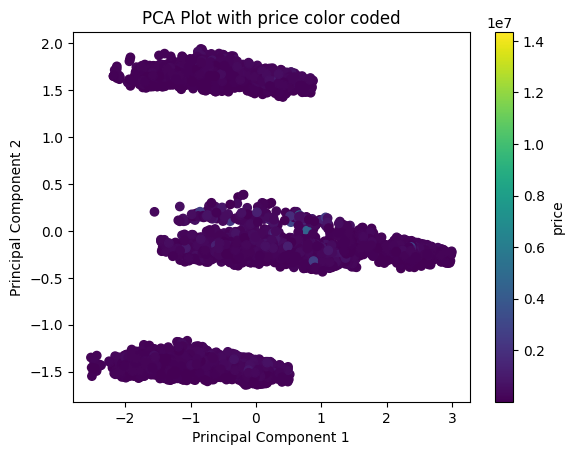

In [4]:
# Use this cell and cells below for summarising your analysis and documenting your decision making.

# I put the data sanity check in the tests (organized by pytest), here are some visualisations of the sampled data

# Here is a PCA of the features so far, i.e. all the data we've uploaded to the database.
# There are some clusters, but hard to find correlations with the prices from where they are alone.
# This is already somewhat of an indication that the final prediction result might not be very accurate...
fynesse.assess.general_PCA_plot_with_one_column_colorcoded()

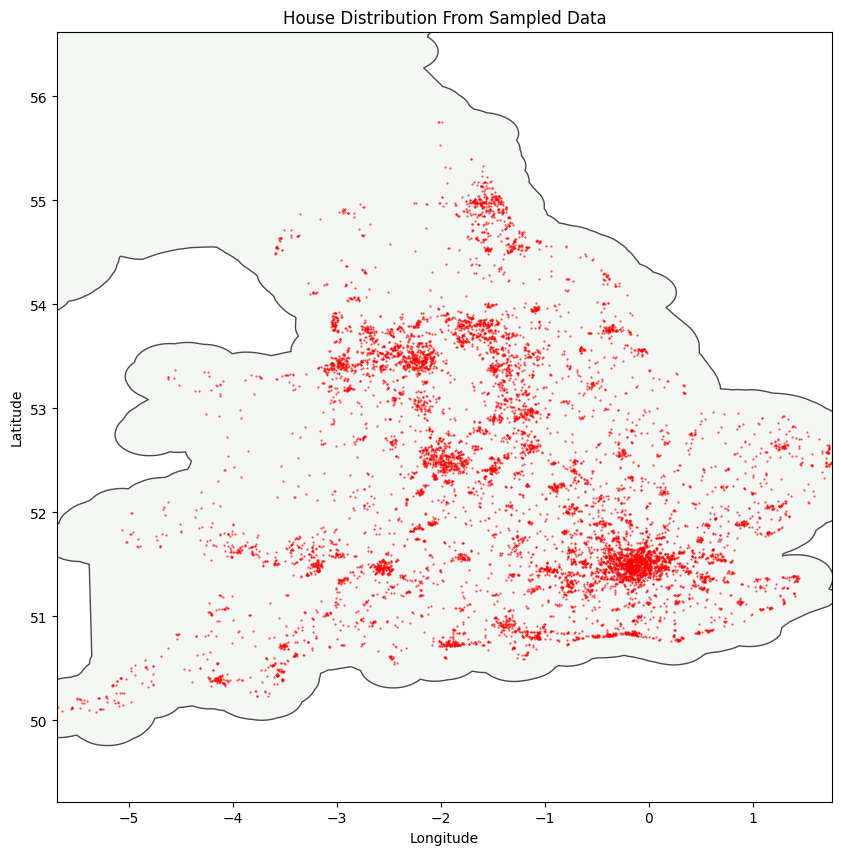

In [5]:
# Here is a plot of the house locations on a UK map. Not hard to guess that the super cluster is where London is :)
fynesse.assess.plot_general_house_distribution()

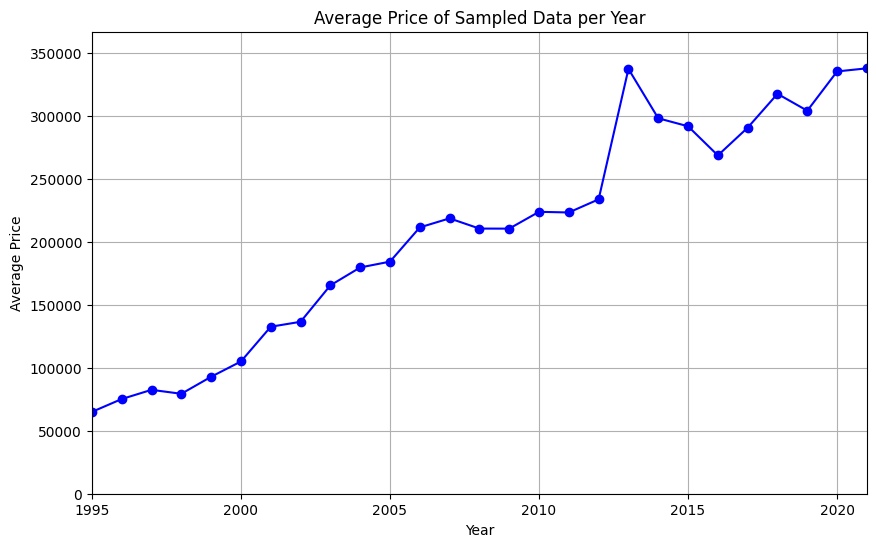

In [6]:
# Price normally increases as time goes on, so here is a plot to show that.
# There is an interesting downfall in 2021, which I assume is due to covid(?)
fynesse.assess.plot_average_house_price_against_year()

## Question 3. Addressing a Property Price Prediction Question

For your final tick, we will be asking you to make house price predictions for a given location, date and property type in the UK. You will provide a function that takes input a latitude and longitude as well as the `property_type` (either type" of property (either `F` - flat, `S` - semidetached, `D` - detached, `T` - terraced or `O` other). Create this function in the `address.py` file, for example in the form,

```
def predict_price(latitude, longitude, date, property_type):
    """Price prediction for UK housing."""
    pass
```

We suggest that you use the following approach when building your prediction.

1. Select a bounding box around the housing location in latitude and longitude.
2. Select a data range around the prediction date.
3. Use the data ecosystem you have build above to build a training set from the relevant time period and location in the UK. Include appropriate features from OSM to improve the prediction.
4. Train a linear model on the data set you have created.
5. Validate the quality of the model.
6. Provide a prediction of the price from the model, warning appropriately if your validation indicates the quality of the model is poor.

Please note that the quality of predictions is not the main focus of the assignment - we expect to see models that output reasonable predictions and have positive R^2's, but you should not spend too much time on increasing the model's accuracy.

The knowledge you need to do a first pass through this question will have been taught by end of lab session four (7th November 2023). You will likely want to review your answer as part of *refactoring* your code shortly before hand in.



## Model decisions

The features I end up using are:
- Date, converted to number of days compared to a reference date
- Type of property, one-hot encoded
- Square root of closest euclidean distance to: school, hospital, library, restaurant, transport, shop, leisure (if none nearby the distance is -1, which means it's just a constant column that does nothing).

Reasonings for the features I include:
- Date - the economics could be related to time, so it could also relate to the price of houses. (we end up choosing a date range to predict, but the range could still be pretty big)
- Type of property - seems like a general indication of the house quality
- Distances - I would like to use actual walking distances but that sadly takes too long. Anyhow there is likely some correlation between that and the house quality. The decrease in price becomes less significant the higher the distances are, so I take the square root of the distance on top of it.

Reasonings for the features I choose not to include:
- City name, street name, etc. - Sounds like cheating. Worried the prediction might need to be verbose and account for a virtual house that does not have address data yet. Also the bounding box might already account for that.
- Other house type information (that are present in the price data) - Seems like we simply do not have access to them when making predictions.

The model is a just GLM, with a link of an identity function. The training data is chosen as all the data in a bounding box around the requested location, with a date that is within the requested date +/- 200 days. (The exact parameters are adjustable in case it takes too long to run or if hardly any data could be found)

Reasonings for the model:
- I am not really any expert at economics, so I figured a simple model should keep my sanity.
- The training data chosen in close approximity to the requested location basically entails information about the nearby area, so this decision makes the tradeoff of having to train on the fly for having higher accuracy.

The shortcomings of the model:
- We could get negative results, but I would just say it's just bad accuracy.
- I would like to experiment more with different possibilities and their impact on accuracy, but the biggest constraint here is that most of them take way too much time to compute.
- Ultimately my "excuses" for bad results is just that the training dataset is not big and fine-tuned. But given the implementation time constraint, the computation resource limitations, and also my poor knowledge in economics, that is basically unavoidable.

c:\Users\86189\AppData\Local\Programs\Python\Python312\Lib\site-packages\fynesse\assess.py:225: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, conn)


==== Validation of current model, level 6 ====
No warning issued

Details of each validation level:
Level | Message
  0   | No validation
  1   | Warnings
  2   | Summary
  3   | Help message
  4   | PCA of feature array
  5   | Stratified Cross-Validation on training dataset
  6   | Area Prediction Plot
              
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  629
Model:                            GLM   Df Residuals:                      616
Model Family:                Gaussian   Df Model:                           12
Link Function:               Identity   Scale:                      6.7459e+10
Method:                          IRLS   Log-Likelihood:                -8727.9
Date:                Wed, 29 Nov 2023   Deviance:                   4.1555e+13
Time:                        00:29:41   Pearson chi2:                 4.16e+13
No. Iterations:                     3   Pseudo 

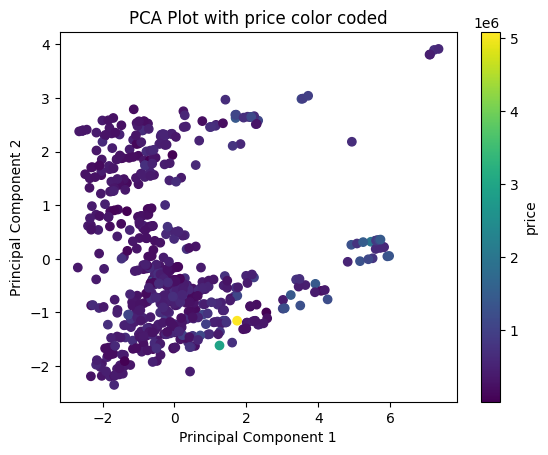

c:\Users\86189\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Stratified Cross-Validation on 5 folds result R^2: 0.3370107270099113
==== End of Validation ====


6424751.94026991

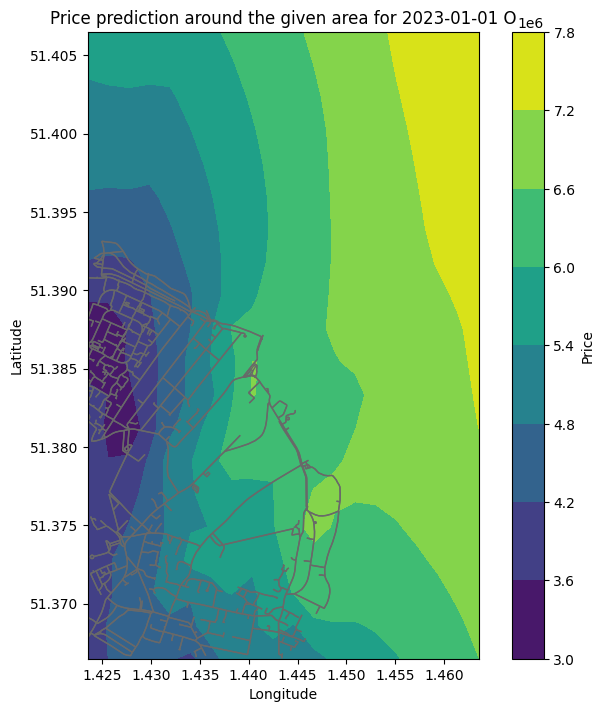

In [7]:
# Example of a prediction with some validations,
# In this example we are predicting the price of a house of type Others at (51.386, 1.444) at 2023-1-1.
# In addition to the prediction result (which is at the very end - 6424751.94026991 GBP),
# I have plotted some other information regrading the current model,
# such as a heatmap of predicted prices around that area using the model.
from datetime import date
fynesse.address.predict_price(51.3864823, 1.4435377, date(2023, 1, 1), 'O', validation_level=6)

## Large Language Models

If you used LLMs to generate or fix code in this assignment (recommended), briefly summarise the process and prompts you used. What do you think of the integration of LLMs in the data science pipeline?

I used the interactive web chat as a separate tab. I collected some of my actual prompts at the end of my thoughts.

I believe LLMs could be very helpful in the pipeline. It has managed to save me quite some time in different places, for example error debugging, basic APIs, reptitive code formatting and more. I can always just shut off my brain and toss the question out, rather than thinking of what words people are going to use when having a similar problem as mine. The simpleness, convenience and swiftness are all that matters here. If there is anything easy to be improved, it is to make them generate answers even faster.

I also want to point out some cases where LLMs end up wasting my time. At the beginning I attempted to integrate LLMs into the project using API keys (as how I did for tick 1), but the AI seems to easily get confused about the context - a lot of the times when I asked a general question, say how to use ".apply", the AI tries to make an example with the dataframe I have previous feeded them, and it takes a lot of effort to correct them. I kind of hope that the default option is have the AI forget about the context and the data every time I give a prompt, so that such nuances could be avoided.

Some of my prompts:
- access pandas series by index
- series get length
- what does -q do in pytest
- how do you specify to pytest to only fnd tests in a subdirectory
- (I copy-pasted an error I got for github action)
```
ERROR: usage: pytest [options] [file_or_dir] [file_or_dir] [...]
pytest: error: unrecognized arguments: --md=/tmp/tmp.Kp9OUO7xLo
  inifile: /home/runner/work/ads/ads/pytest.ini
  rootdir: /home/runner/work/ads/ads

Error: Process completed with exit code 4

...

=====================================================================================
Markdown summaries: https://github.com/jeffrey-22/ads/actions/runs/6989395632
=====================================================================================
```
- test that no value in a df is null or infinite

### FAQs

- Why is my connection to the AWS server intermittent?

If you are using Google Colab, online notebooks may throttle your code or time you out. Local Python code is recommended for tasks for large data management in the database.

- Why do SQL queries take a long time?

Some queries legitimately take a long time, even when done right. We suggest indexing your tables to speed up queries over your database. You can index tables by different columns depending on the queries you want to perform. For example, indexing the tables by `postcode` could speed up the join in Task D. More information regarding indexing in MariaDB is available [here](https://mariadb.com/kb/en/getting-started-with-indexes/).

You may also want to consider creating single or multi-column indices on coordinates, or any other properties you use to select data, if that step is taking a long time.

If your new queries seem stuck, try running `SHOW FULL PROCESSLIST`, and `KILL` any stuck processes.

- Why are table populating processes taking so long?

Again populating the database can take long. However, be careful if you are indexing the tables. You should populate data before indexing. Insert operations are impacted by indexes as they are updated with each new row inserted into the table.

- Some other questions are answered in [this reddit forum](https://www.reddit.com/r/CST_ADS/) or [this doc](https://docs.google.com/document/d/1GfDROyUW8HVs2eyxmJzKrYGRdVyUiVXzPcDfwOO8wX0/edit?usp=sharing). Feel free to also ask about anything that comes up.